# Web Scraping - Github Topics


### About The Project

- Scraping https://github.com/topics to get a list of featured topics.
- For each topic, we'll get the Title, Description and URL.
- And then we will save the data in a CSV file of the following format:

```
Title,Description,URL
3D,3D modeling is the process of virtually developing the surface and structure of a 3D object.,https://github.com/topics/3d
Ajax,Ajax is a technique for creating interactive web applications.,https://github.com/topics/ajax
```

 #### The different steps involved are:
 1. Download the webpage using Requests.
 2. Parsing and extracting the information using BeautifulSoup.
 3. Converting the information to a dataframe using Pandas.
 4. Saving the dataframe as a CSV file.

#### 1. Download the webpage using Requests.

In [1]:
import requests

Github contains six pages of topics. So creating a function to make a list of all the topics pages.

In [2]:
def pages_url():
    page_urls=[]
    for i in range(1,7):
        page_urls.append('https://github.com/topics?page={}'.format(i))
    return page_urls

In [3]:
pages_url()

['https://github.com/topics?page=1',
 'https://github.com/topics?page=2',
 'https://github.com/topics?page=3',
 'https://github.com/topics?page=4',
 'https://github.com/topics?page=5',
 'https://github.com/topics?page=6']

Checking the status code of the responses. The status code 200 indicates that the request has succeeded.

In [4]:
def pages_response():
    responses = []
    for i in pages_url():
        responses.append(requests.get(i))
    for response in responses:
        if response.status_code==200:
            return responses

In [5]:
pages_response()

[<Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>,
 <Response [200]>]

#### 2. Parsing and extracting the information using BeautifulSoup.

In [6]:
from bs4 import BeautifulSoup

Creating a function to pull out appropriate tags for Title, Description and URL from the code.

In [7]:
def tag_selector(tag, tag_class):
    tags = []
    for response in pages_response():
        doc = BeautifulSoup(response.text, 'html.parser')
        tags += doc.find_all(tag, {'class': tag_class})
    return tags

The tag and class for Title:

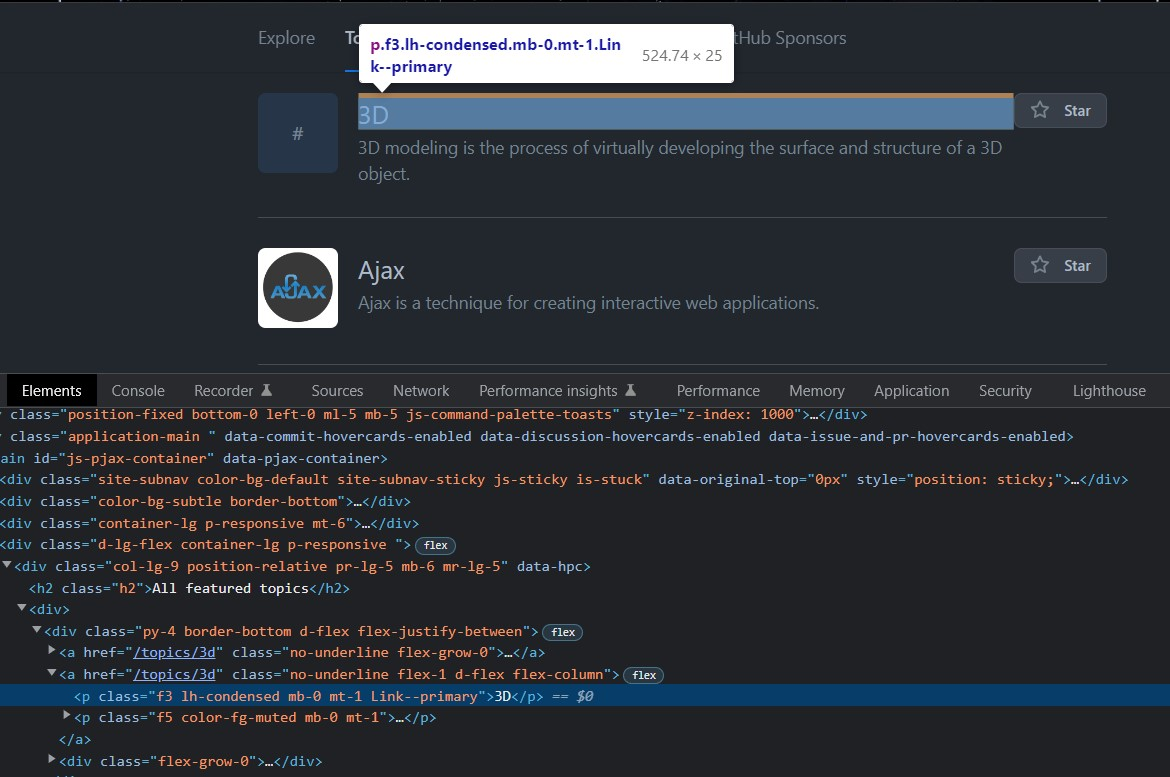

In [8]:
title_tag = 'p'
title_class= 'f3 lh-condensed mb-0 mt-1 Link--primary'

In [9]:
title_tags = tag_selector(title_tag, title_class)
len(title_tags)

180

In [10]:
title_tags[:5]

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>]

Creating a function to pull out the Title from the tags.

In [11]:
def topic_titles():
    titles = []
    for title in title_tags:
        titles.append(title.text)
    return titles

In [12]:
len(topic_titles())

180

In [13]:
topic_titles()[:5]

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android']

The tag and class for Description:

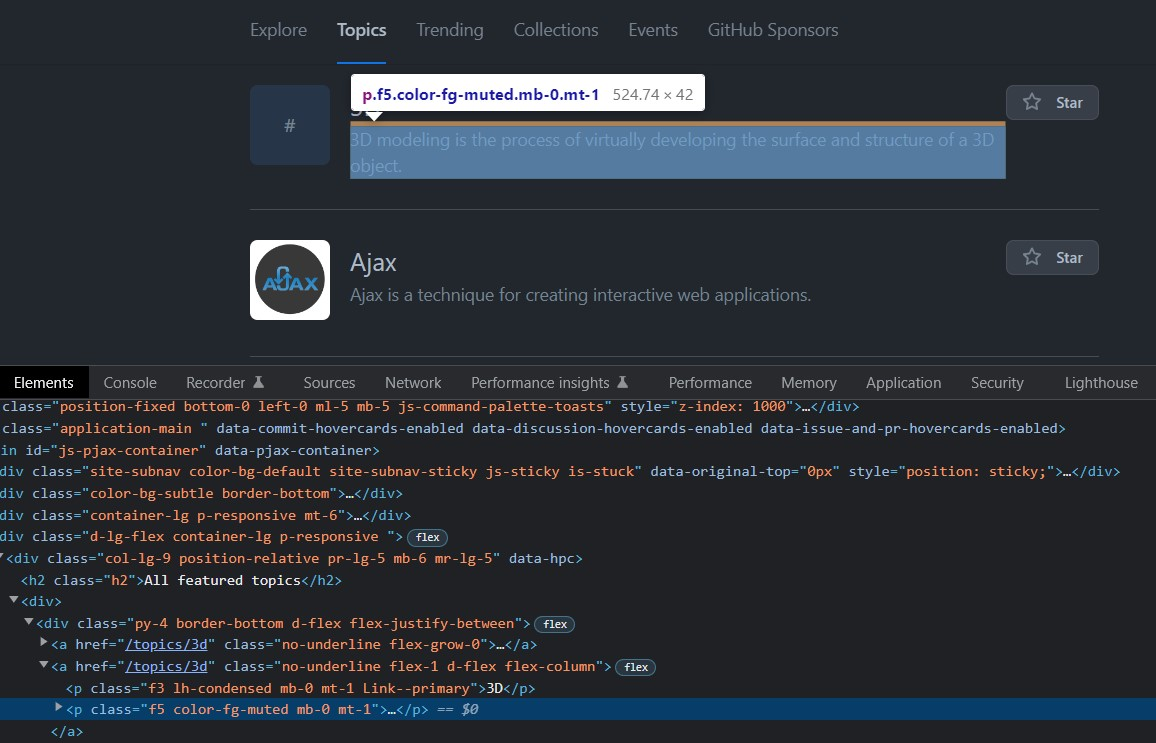

In [14]:
desc_tag = 'p'
desc_class = 'f5 color-fg-muted mb-0 mt-1'

In [15]:
desc_tags = tag_selector(desc_tag, desc_class)
len(desc_tags)

180

In [16]:
desc_tags[:5]

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D modeling is the process of virtually developing the surface and structure of a 3D object.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Amp is a non-blocking concurrency library for PHP.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Android is an operating system built by Google designed for mobile devices.
         </p>]

Creating a function to pull out the Description from the tags.

In [17]:
def topic_desc():
    descriptions = []
    for desc in desc_tags:
        descriptions.append(desc.text.strip())
    return descriptions

In [18]:
topic_desc()[:5]

['3D modeling is the process of virtually developing the surface and structure of a 3D object.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.']

The tag and class for URL:
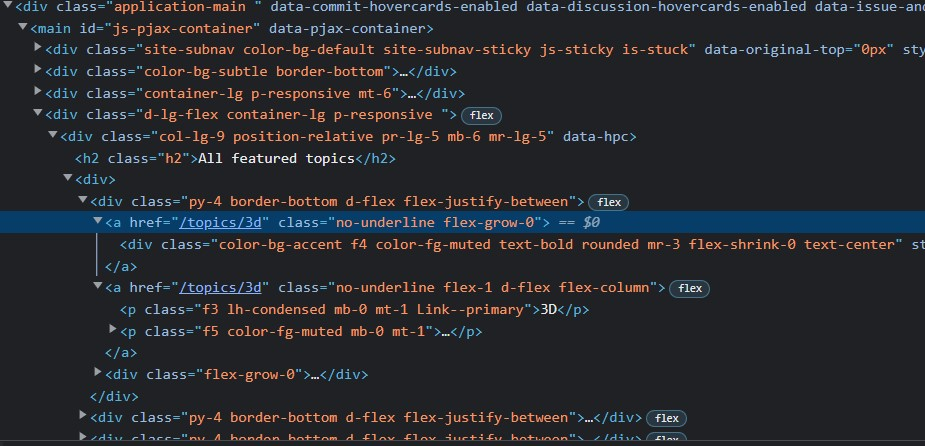

In [19]:
url_tag = 'a'
url_class = 'no-underline flex-grow-0'

In [20]:
url_tags = tag_selector(url_tag, url_class)
len(url_tags)

180

Creating a function to pull out the URL from the tags.

In [21]:
def topic_url():
    urls = []
    base_url = 'https://github.com'
    for url in url_tags:
        urls.append(base_url+url['href'])
    return urls

In [22]:
topic_url()[:5]

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android']

#### 3. Converting the information to a dataframe using Pandas.

In [23]:
import pandas as pd

In [24]:
topics_dict = {
    'Title': topic_titles(),
    'Description': topic_desc(),
    'URL': topic_url()
}

In [25]:
topics_df = pd.DataFrame(topics_dict)

In [26]:
topics_df

,Title,Description,URL
0,3D,3D modeling is the process of virtually develo...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android
...,...,...,...
175,Windows,Windows is Microsoft's GUI-based operating sys...,https://github.com/topics/windows
176,WordPlate,WordPlate is a modern WordPress stack which si...,https://github.com/topics/wordplate
177,WordPress,WordPress is a popular content management syst...,https://github.com/topics/wordpress
178,Xamarin,Xamarin is a platform for developing iOS and A...,https://github.com/topics/xamarin


#### 4. Saving the dataframe as a CSV file.

In [27]:
topics_df.to_csv('GithubTopics.csv', index=None)

GithubTopics.csv will be saved in the folder.